# Summery

The dataset for this project was collected from kaggle and originates from from Nasdaq Financials. fundamentals.csv contains New York Stock Exchange historical metrics extracted from annual SEC 10K fillings (2012-2016), should be enough to derive most of popular fundamental indicators.

In this project, we will focus on clustering and apply unsupervised learning techniques to find the best candidate algorithm that accurately predicts wether a company has net profit or net loss. To do that, we will transform Net Income column into a binary representation of whether or not a company made profit, where 0 represents loss and 1 represents profit.

Why do we use net income?

Net income indicates a company's profit after all of its expenses have been deducted from revenues. This number appears on a company's income statement and is also an indicator of a company's profitability

# Exploratory Data Analysis

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy

# Mute the sklearn and IPython warnings
import warnings
warnings.filterwarnings('ignore', module='sklearn')
pd.options.display.float_format = '{:.2f}'.format

In [23]:
data = pd.read_csv('fundamentals.csv', sep=',')

data.shape

(1781, 79)

In [50]:
data.head(3)

,Accounts Payable,After Tax ROE,Capital Expenditures,Cash and Cash Equivalents,Changes in Inventories,Common Stocks,Cost of Revenue,Deferred Asset Charges,Deferred Liability Charges,Effect of Exchange Rate,...,Total Assets,Total Current Assets,Total Current Liabilities,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,kmeans,agglom_complete,agglom_ward
0,0.35,0.30,-0.21,0.24,0.17,0.53,0.42,-0.84,0.58,0.24,...,0.26,0.52,0.60,0.61,0.01,0.84,0.25,1,0,1
1,0.48,1.39,-0.63,0.51,0.17,-0.11,0.43,-0.84,0.73,0.24,...,0.70,0.60,0.65,1.00,0.70,0.90,0.28,1,0,1
2,0.47,2.17,-1.36,0.40,0.17,-0.04,0.49,-0.84,0.71,0.24,...,0.71,0.58,0.65,0.94,0.71,1.28,0.28,1,0,1


In [25]:
data['Net Income']

0      -1876000000.00
1      -1834000000.00
2       2882000000.00
3       7610000000.00
4        387670000.00
            ...      
1776     309471000.00
1777     504000000.00
1778     583000000.00
1779     339000000.00
1780     821000000.00
Name: Net Income, Length: 1781, dtype: float64

In [26]:
data['Net Income'] = data['Net Income'].apply(lambda x : 1 if x > 0 else 0)

In [27]:
data['Net Income']

0       0
1       0
2       1
3       1
4       1
       ..
1776    1
1777    1
1778    1
1779    1
1780    1
Name: Net Income, Length: 1781, dtype: int64

In [29]:
data['Net Income'].value_counts()

1    1679
0     102
Name: Net Income, dtype: int64

In [30]:
log_columns = data.skew().sort_values(ascending=False)
log_columns = log_columns.loc[log_columns > 0.75]

log_columns

C:\Users\faiza\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Pre-Tax ROE                                           18.00
After Tax ROE                                         15.98
Other Operating Activities                            15.83
Minority Interest                                     15.77
Equity Earnings/Loss Unconsolidated Subsidiary        14.91
Accounts Receivable                                   14.46
Common Stocks                                         12.15
Short-Term Debt / Current Portion of Long-Term Debt   11.88
Non-Recurring Items                                   11.80
Long-Term Debt                                        11.36
Interest Expense                                      11.28
Other Liabilities                                     11.07
Short-Term Investments                                10.87
Cash and Cash Equivalents                             10.11
Intangible Assets                                     10.03
Add'l income/expense items                             9.98
Other Current Liabilities               

In [31]:
for col in log_columns.index:
    data[col] = np.log1p(data[col])

C:\Users\faiza\anaconda3\envs\tf\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [32]:
data.dropna(axis=1,inplace=True)

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 49 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Unnamed: 0                                           1781 non-null   int64  
 1   Ticker Symbol                                        1781 non-null   object 
 2   Period Ending                                        1781 non-null   object 
 3   Accounts Payable                                     1781 non-null   float64
 4   After Tax ROE                                        1781 non-null   float64
 5   Capital Expenditures                                 1781 non-null   float64
 6   Cash and Cash Equivalents                            1781 non-null   float64
 7   Changes in Inventories                               1781 non-null   float64
 8   Common Stocks                                        1781 non-null  

In [34]:
data.isnull().sum()

Unnamed: 0                                             0
Ticker Symbol                                          0
Period Ending                                          0
Accounts Payable                                       0
After Tax ROE                                          0
Capital Expenditures                                   0
Cash and Cash Equivalents                              0
Changes in Inventories                                 0
Common Stocks                                          0
Cost of Revenue                                        0
Deferred Asset Charges                                 0
Deferred Liability Charges                             0
Effect of Exchange Rate                                0
Fixed Assets                                           0
Goodwill                                               0
Gross Margin                                           0
Intangible Assets                                      0
Interest Expense               

In [35]:
data.describe()

,Unnamed: 0,Accounts Payable,After Tax ROE,Capital Expenditures,Cash and Cash Equivalents,Changes in Inventories,Common Stocks,Cost of Revenue,Deferred Asset Charges,Deferred Liability Charges,...,Sale and Purchase of Stock,Short-Term Debt / Current Portion of Long-Term Debt,Short-Term Investments,Total Assets,Total Current Assets,Total Current Liabilities,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock
count,1781.00,1781.00,1781.00,1781.00,1781.00,1781.00,1781.00,1781.00,1781.00,1781.00,...,1781.00,1781.00,1781.00,1781.00,1781.00,1781.00,1781.00,1781.00,1781.00,1781.00
mean,890.00,20.57,2.89,-1251924663.11,20.57,-67877487.37,15.99,20.77,8.11,13.68,...,-765204288.60,15.54,7.50,23.54,18.38,18.00,23.03,23.54,22.89,-3951522290.29
std,514.27,3.64,0.96,2979962962.67,1.83,390336885.93,5.07,5.48,9.61,9.59,...,2747835966.92,8.12,9.76,1.34,8.32,8.17,1.50,1.34,1.24,14070468017.89
min,0.00,0.00,0.00,-37985000000.00,9.95,-5562000000.00,0.00,0.00,0.00,0.00,...,-58852000000.00,0.00,0.00,14.81,0.00,0.00,14.76,14.81,14.23,-229734000000.00
25%,445.00,20.06,2.40,-1151200000.00,19.55,-54000000.00,14.30,20.90,0.00,0.00,...,-749500000.00,15.27,0.00,22.60,20.77,20.15,22.07,22.60,22.04,-3040895000.00
50%,890.00,21.01,2.83,-358000000.00,20.58,0.00,15.86,22.03,0.00,19.14,...,-210227000.00,19.18,0.00,23.44,21.73,21.25,22.94,23.44,22.81,-306835000.00
75%,1335.00,21.90,3.30,-129100000.00,21.56,0.00,19.51,23.01,18.81,20.80,...,2385000.00,20.68,19.36,24.31,22.54,22.20,23.90,24.31,23.58,0.00
max,1780.00,26.06,8.66,5000000.00,27.31,3755000000.00,25.79,26.62,24.33,24.75,...,5410000000.00,26.50,25.39,28.58,25.66,25.23,28.48,28.58,26.91,0.00


# Feature Transformation


- Drop "Unnamed: 0", "Ticker Symbol" and "Period Ending" column as they don't carry any information.
- Drop columns with missing values.
- Make sure all the columns are continuous which is what we need for K-means clustering.
- Transform Net Income into a binary column
- Ensure the data is scaled and normally distribute

In [39]:
data.drop(['Unnamed: 0', 'Ticker Symbol', 'Period Ending'],axis = 1, inplace=True)
data.dropna(axis=1,inplace=True)

In [40]:
data.dtypes.all() == 'float64'

False

In [41]:
sc = StandardScaler()
feature_columns = [x for x in data.columns if x not in 'Net Income']
for col in feature_columns:
    data[col] = sc.fit_transform(data[[col]])

data.head(4)

,Accounts Payable,After Tax ROE,Capital Expenditures,Cash and Cash Equivalents,Changes in Inventories,Common Stocks,Cost of Revenue,Deferred Asset Charges,Deferred Liability Charges,Effect of Exchange Rate,...,Sale and Purchase of Stock,Short-Term Debt / Current Portion of Long-Term Debt,Short-Term Investments,Total Assets,Total Current Assets,Total Current Liabilities,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock
0,0.35,0.30,-0.21,0.24,0.17,0.53,0.42,-0.84,0.58,0.24,...,0.28,0.68,1.48,0.26,0.52,0.60,0.61,0.01,0.84,0.25
1,0.48,1.39,-0.63,0.51,0.17,-0.11,0.43,-0.84,0.73,0.24,...,0.28,0.68,1.57,0.70,0.60,0.65,1.00,0.70,0.90,0.28
2,0.47,2.17,-1.36,0.40,0.17,-0.04,0.49,-0.84,0.71,0.24,...,-0.10,0.70,1.54,0.71,0.58,0.65,0.94,0.71,1.28,0.28
3,0.49,2.11,-1.64,0.13,0.17,-0.07,0.43,1.41,0.69,0.24,...,-1.12,0.74,1.54,0.80,0.56,0.65,0.97,0.80,1.25,0.28


In [43]:
sc = StandardScaler()
feature_columns = [x for x in data.columns if x not in 'Net Income']
for col in feature_columns:
    data[col] = sc.fit_transform(data[[col]])


# Train models

- Fit a K-means clustering model with two clusters and
- Fit 2 Agglomerative clustering models with two clusters (ward-link and complete-link clustering)
- Compare the results to those obtained by K-means with regards to wine color by reporting the number of red and white observations in each cluster for both K-means and agglomerative clustering.
- Visualize the dendrogram produced by agglomerative clustering

# K-means

In [44]:
km = KMeans(n_clusters=2, random_state=42)
km = km.fit(data[feature_columns])

data['kmeans'] = km.predict(data[feature_columns])
(data[['Net Income','kmeans']]
 .groupby(['kmeans','Net Income'])
 .size()
 .to_frame()
 .rename(columns={0:'number'}))

number
kmeans Net Income        
0      0                8
       1              295
1      0               94
       1             1384

# Agglomerative Clustering

In [51]:
ag = AgglomerativeClustering(n_clusters=2, linkage='ward', compute_full_tree=True)
ag = ag.fit(data[feature_columns])
data[str('agglom_'+linkage)] = ag.fit_predict(data[feature_columns])

In [52]:
(data[['Net Income','agglom_ward']]
 .groupby(['Net Income','agglom_ward'])
 .size()
 .to_frame()
 .rename(columns={0:'number'}))

number
Net Income agglom_ward        
0          0                13
           1                89
1          0               323
           1              1356

In [53]:
ag = AgglomerativeClustering(n_clusters=2, linkage='complete', compute_full_tree=True)
ag = ag.fit(data[feature_columns])
data[str('agglom_'+linkage)] = ag.fit_predict(data[feature_columns])

In [54]:
(data[['Net Income','agglom_complete']]
     .groupby(['Net Income','agglom_complete'])
     .size()
     .to_frame()
     .rename(columns={0:'number'}))

number
Net Income agglom_complete        
0          0                   102
1          0                  1671
           1                     8

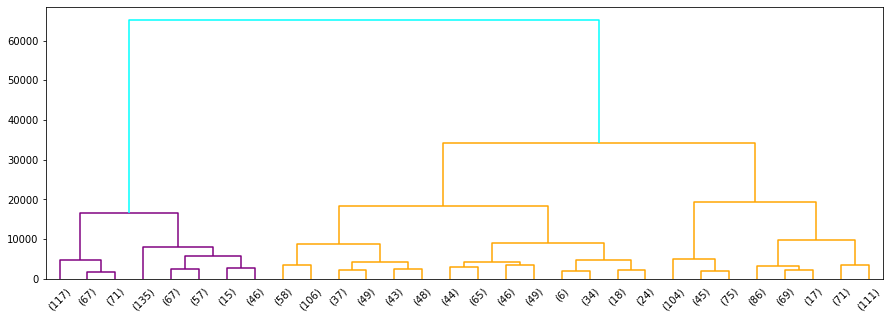

In [60]:
Z = hierarchy.linkage(ag.children_, method='ward')

fig, ax = plt.subplots(figsize=(15,5))


hierarchy.set_link_color_palette(['purple', 'orange'])

den = hierarchy.dendrogram(Z, orientation='top', 
                           p=30, truncate_mode='lastp',
                           show_leaf_counts=True, ax=ax,
                           above_threshold_color='cyan')

# Results

- Comparing the results shows that I am able to predict profit better than loss which is what I expected given that we have - more data for companies with profit(1: 1679 vs 0: 102). The best algorithm for predicting loss is the Complete-link - ---- Agglomerative Clustering model and for predicting profit KMeans Clustering seems to be the best candidate althought Ward-- link Agglomerative Clustering achieved nearly the same result.

- Better result could be achieved by performing PCA or hyperparameter tuning.